<a href="https://colab.research.google.com/github/offthetab/statistics_homework/blob/main/%D0%9F%D0%A0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Вариант 4
1 и 4 файлы – нормальное распределение

3 и 6 файлы – показательное распределение

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2, sqrt, e, pi
from scipy. stats import norm, chi2

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

## Функция 'open_file' для чтения данных из файлов.
## Функция 'show_hist' для отрисовки гистограммы распределения, расчета: интервалов, абсолютных и относительных частот

In [ ]:
def open_file(path: str):
  with open(path, 'r') as f:
    data = f.read()
  data = np.array(data.split("\n"))[:-1]
  data = data.astype(np.float64)
  print("Длина списка:", len(data))
  return data

def show_hist(data):
  m = round(1 + log2(len(data)))  # кол-во интервалов
  h = (max(data) - min(data)) / m  # шаг

  intervals = [(min(data) - 0.01) + (i * h) for i in range(m + 1)]
  intervals[-1] = intervals[-1] + 0.01

  int = []
  for i, num in enumerate(intervals):
    if(i != len(intervals) - 1):
        int.append([round(num, 3), round(intervals[i+1], 3)])
    else:
        break

  # Абсолютные частоты
  absolute_freq = [0]*len(int)
  for num in data:
    for index, interval in enumerate(int):
      if (num >= interval[0] and num < interval[1]):
        absolute_freq[index] += 1
        break

  # Относительные частоты
  relative_freq = np.array(absolute_freq) / len(data)


  print("Интервалы:", int)
  print("Абсолютные частоты:", absolute_freq)
  print("Относительные частоты:", relative_freq)

  x = np.arange(len(relative_freq))
  hist_outpt = ['{a} - {b}'.format(a=round(i[0], 2), b=round(i[1], 2)) for i in int]
  plt.figure(figsize=(12, 6))
  plt.bar(x, height=relative_freq)
  plt.title("Гистограмма распределения относительных частот\n для рассчитанных интервалов выборки")
  plt.xlabel('X')
  plt.ylabel('Относительная частота')
  plt.xticks(x, hist_outpt)
  plt.show()


  return int, absolute_freq, relative_freq

def normal_dest_func(x):  # Значение функции распределения в точке стандартного нормального распределения (мат ожидание = 0 и дисперсия = 1)
  return norm.cdf(x)

## Проверка гипотезы о нормальности распределения. H0 (нулевая гипотеза) - выборка имеет нормальное распределение. Альтернаятивная гипотеза - выборка имеет распределение отличное от нормального.  

In [ ]:
def Normality_distribution_test(data, int, absolute_freq, relative_freq) -> None:
  print("Проверка гипотезы о нормальности распределения")

  # Выборочная средняя
  sample_mean = round(data.mean(), 3)
  print("\nВыборочное среднее для всей выборки:", sample_mean)

  # Несмещенное стандартное отклонение
  std = np.sqrt(np.sum((data - sample_mean)**2) / (len(data) - 1))
  std = round(std
  print("Несмещенное стандартное отклонение", std)

  # Расчет теоритических частот интервалов
  theor_freqs = np.zeros(len(absolute_freq))
  for i, interval in enumerate(int):
    f1 = round((interval[1] - sample_mean) / std, 3)  # z статистики для правых границ интервала
    f2 = round((interval[0] - sample_mean) / std, 3)  # z статистики для левых границ интервала

    theor_freq = round((normal_dest_func(f1) - normal_dest_func(f2)) * len(data), 3)  # теоритическая часота на данном интервале
    theor_freqs[i] = theor_freq

    print("\n", i, interval, "ni:", absolute_freq[i], "- эмпирическая частота на интервале;","Ф_left:", f1,"Ф_right:", f2, " Теор частота", theor_freq)

  print("\nКритерий согласия Пирсона")
  chi_our = np.sum((np.array(absolute_freq) - theor_freqs) ** 2 / theor_freqs)
  chi_normal = chi2.ppf(0.95, len(theor_freqs) - 2 - 1)
  print("Кси нашего распределения:", chi_our)
  print("Кси нормального распределения:", chi_normal)  # 6 - число интервалов 2 - число параметров распределения (мат одидание и дисперсия) k = 6 - 2 -1 для 1 распределения

  print("\nВывод о принятии или отвержении нулевой гипотезы")
  if (chi_our > chi_normal):
    print("Нулевая гипотеза отвергается")
    print("Распределение отлично от нормального")
  else:
    print("Нулевая гипотеза принимается")
    print("Распределение является нормальным")


## Проверка гипотезы о показателном распределении. H0 (нулевая гипотеза) - выборка имеет показательное распределение. Альтернаятивная гипотеза - выборка имеет распределение отличное от показательного.  

In [ ]:
def Exponential_distribution_test(data, int, absolute_freq, relative_freq) -> None:
  print("Проверка гипотезы о показательном распределении")

  # Выборочная средняя
  sample_mean = round(data.mean(), 3)
  print("\nВыборочное среднее для всей выборки:", sample_mean)

  # Несмещенное стандартное отклонение
  std = np.sqrt(np.sum((data - sample_mean)**2) / (len(data) - 1))
  std = round(std, 3)
  print("Несмещенное стандартное отклонение", std)

  # Расчет теоритических частот интервалов
  theor_freqs = np.zeros(len(absolute_freq))
  for i, interval in enumerate(int):

    # вычисление Pi
    a = e ** (- interval[0] / sample_mean)
    b = e ** (- interval[1] / sample_mean)
    theor_freq = (a - b) * len(data)

    theor_freqs[i] = theor_freq

    print("\n", i, interval, "ni:", absolute_freq[i], "- эмпирическая частота на интервале;", " Теор частота", theor_freq)

  print("\nКритерий согласия Пирсона")
  chi_our = np.sum((np.array(absolute_freq) - theor_freqs) ** 2 / theor_freqs)
  chi_normal = chi2.ppf(0.95, len(data) - 1 - 1)
  print("Кси нашего распределения:", chi_our)
  print("Кси показательного распределения:", chi_normal)  # длина выборки - число интервалов 2 - число параметров распределения k = 32 - 1 -1 для 1 распределения

  print("\nВывод о принятии или отвержении нулевой гипотезы")
  if (chi_our > chi_normal):
    print("Нулевая гипотеза отвергается")
    print("Распределение отлично от показательного")
  else:
    print("Нулевая гипотеза принимается")
    print("Распределение является показательным")

## Функции анаморфоз для нормального и показательного распределения. Каждая функция преобразует систему координат для нормального или показательного распределения. Выводит графики полученых точек (столбцов интервального ряда), строит линейную регрессию по точкам, производит расчет метрики R2 и производит поиск параметров распределения по построенным прямым.

In [ ]:
def Normal_anamorphosis(data, int, relative_freq) -> None:
  print("Анаморфоза для нормального распределения")

  # Удаление столбцов с нулевыми частотами
  index_to_delete = []
  for i, num in enumerate(relative_freq):
    if num == 0:
      index_to_delete.append(i)

  int = np.delete(int, index_to_delete, axis=0)
  relative_freq = np.delete(relative_freq, index_to_delete)

  # Расчет ln(w)
  y = np.log(relative_freq)

  # Расчет центров интервалов
  centres_of_intervals = []
  for i, interval in enumerate(int):
    centres_of_intervals.append(round((interval[0]+interval[1]) / 2, 3))

  centres_of_intervals = np.array(centres_of_intervals)

  # Расчет средней от выборки и среднего квадратичного отклонения средних интервалов от среднего
  mean = data.mean()
  mae = (centres_of_intervals - mean) ** 2

  print("log(w):", y)
  print("mae:", mae)

  # Расчет регрессионной прямой
  X_new = np.c_[mae, np.ones(len(mae))]
  W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

  # Поиск параметров нормального распределения по построенным прямым (sigma или std)
  std = np.sqrt(-1/(2*W[0]))
  print("\nПоиск параметров нормального распределения по построенным прямым (sigma или std)")
  print('sigma (std) =', std)

  # Построение графика анаморфозы и регрессии
  fig, ax = plt.subplots()
  plt.figure(figsize=(5,5))
  ax.scatter(x=mae ,y=y)
  ax.plot(mae, X_new@W, color='g')
  ax.set_title(f'Анаморфоза нормального распределения; R2 = {r2_score(y, X_new@W).round(3)}')
  ax.set_xlabel("(x-mean)^2")
  ax.set_ylabel("ln(w)")
  ax.grid()
  plt.show()


In [ ]:
def Exponential_anamorphosis(data, int, relative_freq):
  print("Анаморфоза для показательного распределения")

  # Удаление столбцов с нулевыми частотами
  index_to_delete = []
  for i, num in enumerate(relative_freq):
    if num == 0:
      index_to_delete.append(i)

  int = np.delete(int, index_to_delete, axis=0)
  relative_freq = np.delete(relative_freq, index_to_delete)

  # Расчет ln(w)
  y = np.log(relative_freq)

  # Расчет центров интервалов
  centres_of_intervals = []
  for i, interval in enumerate(int):
    centres_of_intervals.append(round((interval[0]+interval[1]) / 2, 3))

  centres_of_intervals = np.array(centres_of_intervals)

  print("log(w):", y)
  print("centres", centres_of_intervals)

  # Расчет регрессионной прямой
  X_new = np.c_[centres_of_intervals, np.ones(len(centres_of_intervals))]
  W = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

  # Поиск параметров показательного распределения по построенным прямым (lambda)
  lambd = -1/W[0]
  print("\nПоиск параметров показательного распределения по построенным прямым (lambda)")
  print('lambda =', lambd)

  # Построение графика анаморфозы и регрессии
  fig, ax = plt.subplots()
  plt.figure(figsize=(5,5))
  ax.scatter(x=centres_of_intervals ,y=y)
  ax.plot(centres_of_intervals, X_new@W, color='g')
  ax.set_title(f'Анаморфоза показательного распределения; R2 = {r2_score(y, X_new@W).round(3)}')
  ax.set_xlabel("X")
  ax.set_ylabel("ln(w)")
  ax.grid()
  plt.show()


## Файл '1.txt' - нормальное распределение


Длина списка: 32
Интервалы: [[-12.242, -5.982], [-5.982, 0.278], [0.278, 6.539], [6.539, 12.799], [12.799, 19.059], [19.059, 25.33]]
Абсолютные частоты: [1, 3, 9, 11, 3, 5]
Относительные частоты: [0.03125 0.09375 0.28125 0.34375 0.09375 0.15625]


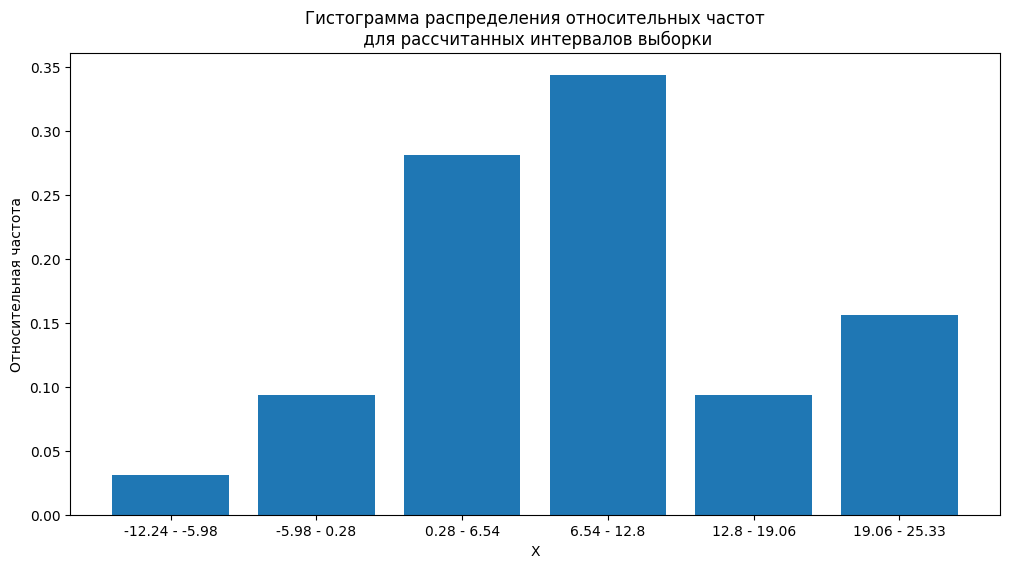

In [ ]:
# нормальное распределение
data = open_file('1.txt')

# Отрисовка гистограммы
int, absolute_freq, relative_freq = show_hist(data) # show_hist вычисляет интервалы, частоты и рисует гистограмму

In [ ]:
# Проверка гипотезы о нормальности распределения
Normality_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о нормальности распределения

Выборочное среднее для всей выборки: 8.28
Несмещенное стандартное отклонение 8.646

 0 [-12.242, -5.982] ni: 1 - эмпирическая частота на интервале; Ф_left: -1.65 Ф_right: -2.374  Теор частота 1.302

 1 [-5.982, 0.278] ni: 3 - эмпирическая частота на интервале; Ф_left: -0.926 Ф_right: -1.65  Теор частота 4.088

 2 [0.278, 6.539] ni: 9 - эмпирическая частота на интервале; Ф_left: -0.201 Ф_right: -0.926  Теор частота 7.78

 3 [6.539, 12.799] ni: 11 - эмпирическая частота на интервале; Ф_left: 0.523 Ф_right: -0.201  Теор частота 8.933

 4 [12.799, 19.059] ni: 3 - эмпирическая частота на интервале; Ф_left: 1.247 Ф_right: 0.523  Теор частота 6.217

 5 [19.059, 25.33] ni: 5 - эмпирическая частота на интервале; Ф_left: 1.972 Ф_right: 1.247  Теор частота 2.621

Критерий согласия Пирсона
Кси нашего распределения: 4.853195008659293
Кси нормального распределения: 7.814727903251179

Вывод о принятии или отвержении нулевой гипотезы
Нулевая гипотеза при

In [ ]:
# Проверка гипотезы о показательном распределении
Exponential_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о показательном распределении

Выборочное среднее для всей выборки: 8.28
Несмещенное стандартное отклонение 8.646

 0 [-12.242, -5.982] ni: 1 - эмпирическая частота на интервале;  Теор частота 74.45986236507015

 1 [-5.982, 0.278] ni: 3 - эмпирическая частота на интервале;  Теор частота 34.96059508968744

 2 [0.278, 6.539] ni: 9 - эмпирическая частота на интервале;  Теор частота 16.4165473130573

 3 [6.539, 12.799] ni: 11 - эмпирическая частота на интервале;  Теор частота 7.706186940748854

 4 [12.799, 19.059] ni: 3 - эмпирическая частота на интервале;  Теор частота 3.618229644315619

 5 [19.059, 25.33] ni: 5 - эмпирическая частота на интервале;  Теор частота 1.7008371828070554

Критерий согласия Пирсона
Кси нашего распределения: 112.95488490339952
Кси показательного распределения: 43.77297182574219

Вывод о принятии или отвержении нулевой гипотезы
Нулевая гипотеза отвергается
Распределение отлично от показательного


Анаморфоза для нормального распределения
log(w): [-3.4657359  -2.36712361 -1.26851133 -1.06784063 -2.36712361 -1.85629799]
mae: [302.46664759 123.9118126   23.73217761   1.93052048  58.51380548
 193.61140981]

Поиск параметров нормального распределения по построенным прямым (sigma или std)
sigma (std) = 8.871297930967508


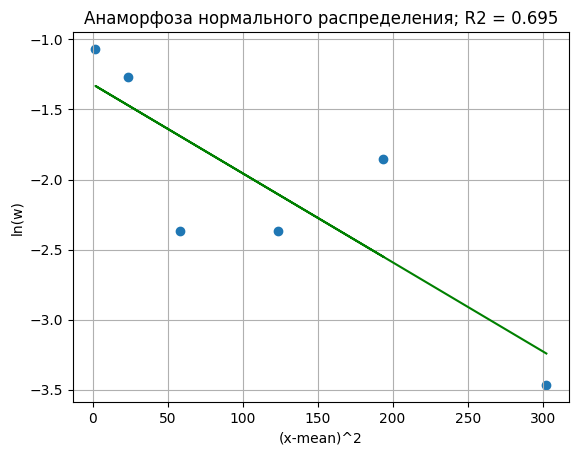

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для нормального распределения
Normal_anamorphosis(data, int, relative_freq)

Анаморфоза для показательного распределения
log(w): [-3.4657359  -2.36712361 -1.26851133 -1.06784063 -2.36712361 -1.85629799]
centres [-9.112 -2.852  3.408  9.669 15.929 22.194]

Поиск параметров показательного распределения по построенным прямым (lambda)
lambda = -26.570703408454726


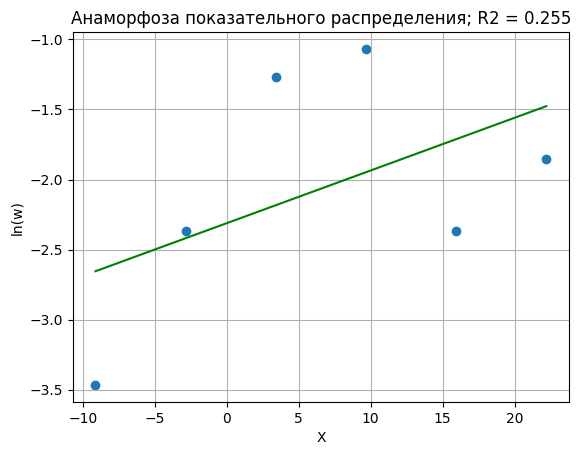

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для показательного распределения
Exponential_anamorphosis(data, int, relative_freq)

## Файл '4.txt' - нормальное распределение

Длина списка: 128
Интервалы: [[-13.819, -9.922], [-9.922, -6.026], [-6.026, -2.129], [-2.129, 1.768], [1.768, 5.664], [5.664, 9.561], [9.561, 13.458], [13.458, 17.365]]
Абсолютные частоты: [3, 7, 24, 29, 32, 22, 9, 2]
Относительные частоты: [0.0234375 0.0546875 0.1875    0.2265625 0.25      0.171875  0.0703125
 0.015625 ]


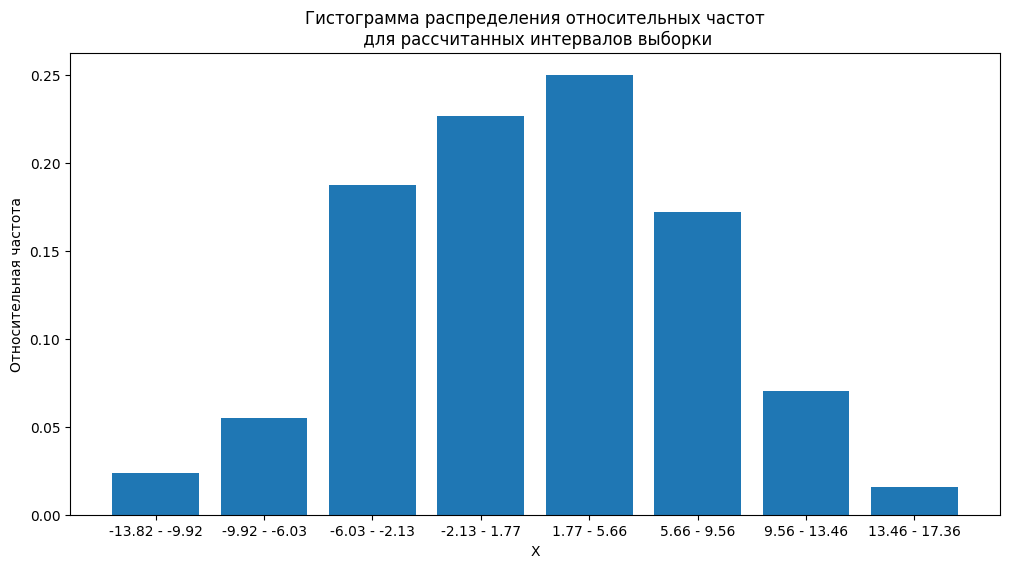

In [ ]:
# нормальное распределение
data = open_file('4.txt')

# Отрисовка гистограммы
int, absolute_freq, relative_freq = show_hist(data) # show_hist вычисляет интервалы, частоты и рисует гистограмму

In [ ]:
# Проверка гипотезы о нормальности распределения
Normality_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о нормальности распределения

Выборочное среднее для всей выборки: 1.887
Несмещенное стандартное отклонение 5.898

 0 [-13.819, -9.922] ni: 3 - эмпирическая частота на интервале; Ф_left: -2.002 Ф_right: -2.663  Теор частота 2.403

 1 [-9.922, -6.026] ni: 7 - эмпирическая частота на интервале; Ф_left: -1.342 Ф_right: -2.002  Теор частота 8.596

 2 [-6.026, -2.129] ni: 24 - эмпирическая частота на интервале; Ф_left: -0.681 Ф_right: -1.342  Теор частота 20.242

 3 [-2.129, 1.768] ni: 29 - эмпирическая частота на интервале; Ф_left: -0.02 Ф_right: -0.681  Теор частота 31.243

 4 [1.768, 5.664] ni: 32 - эмпирическая частота на интервале; Ф_left: 0.64 Ф_right: -0.02  Теор частота 31.602

 5 [5.664, 9.561] ni: 22 - эмпирическая частота на интервале; Ф_left: 1.301 Ф_right: 0.64  Теор частота 21.051

 6 [9.561, 13.458] ni: 9 - эмпирическая частота на интервале; Ф_left: 1.962 Ф_right: 1.301  Теор частота 9.184

 7 [13.458, 17.365] ni: 2 - эмпирическая частота на интервале; Ф_lef

In [ ]:
# Проверка гипотезы о показательном распределении
Exponential_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о показательном распределении

Выборочное среднее для всей выборки: 1.887
Несмещенное стандартное отклонение 5.898

 0 [-13.819, -9.922] ni: 3 - эмпирическая частота на интервале;  Теор частота 169347.7639762239

 1 [-9.922, -6.026] ni: 7 - эмпирическая частота на интервале;  Теор частота 21470.81500479744

 2 [-6.026, -2.129] ni: 24 - эмпирическая частота на интервале;  Теор частота 2724.047041851573

 3 [-2.129, 1.768] ni: 29 - эмпирическая частота на интервале;  Теор частота 345.3958348192936

 4 [1.768, 5.664] ni: 32 - эмпирическая частота на интервале;  Теор частота 43.79113074013667

 5 [5.664, 9.561] ni: 22 - эмпирическая частота на интервале;  Теор частота 5.555872011628386

 6 [9.561, 13.458] ni: 9 - эмпирическая частота на интервале;  Теор частота 0.7044573834896691

 7 [13.458, 17.365] ni: 2 - эмпирическая частота на интервале;  Теор частота 0.08939030117497766

Критерий согласия Пирсона
Кси нашего распределения: 193955.0398483384
Кси показательного распред

Анаморфоза для нормального распределения
log(w): [-3.75341798 -2.90612011 -1.67397643 -1.48473443 -1.38629436 -1.76098781
 -2.65480569 -4.15888308]
mae: [189.25195117  97.23710048  35.56795302   4.27202356   3.34565287
  32.77691419  92.60429595 182.92867061]

Поиск параметров нормального распределения по построенным прямым (sigma или std)
sigma (std) = 5.936781370090277


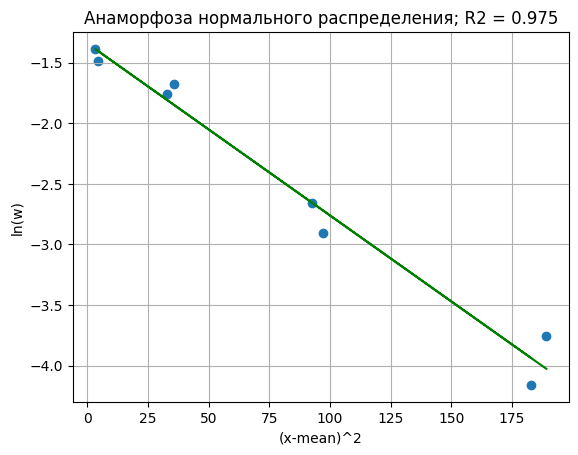

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для нормального распределения
Normal_anamorphosis(data, int, relative_freq)

Анаморфоза для показательного распределения
log(w): [-3.75341798 -2.90612011 -1.67397643 -1.48473443 -1.38629436 -1.76098781
 -2.65480569 -4.15888308]
centres [-11.87   -7.974  -4.077  -0.18    3.716   7.612  11.51   15.412]

Поиск параметров показательного распределения по построенным прямым (lambda)
lambda = 187.10999770848176


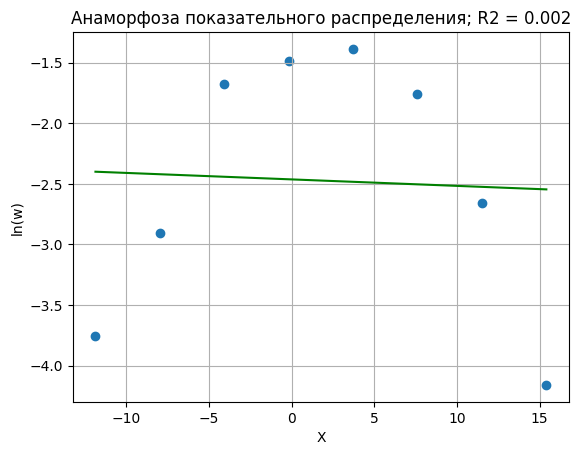

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для показательного распределения
Exponential_anamorphosis(data, int, relative_freq)

## Файл '3.txt' - показательное распределение

Длина списка: 32
Интервалы: [[0.013, 1.435], [1.435, 2.857], [2.857, 4.28], [4.28, 5.702], [5.702, 7.124], [7.124, 8.556]]
Абсолютные частоты: [17, 6, 3, 5, 0, 1]
Относительные частоты: [0.53125 0.1875  0.09375 0.15625 0.      0.03125]


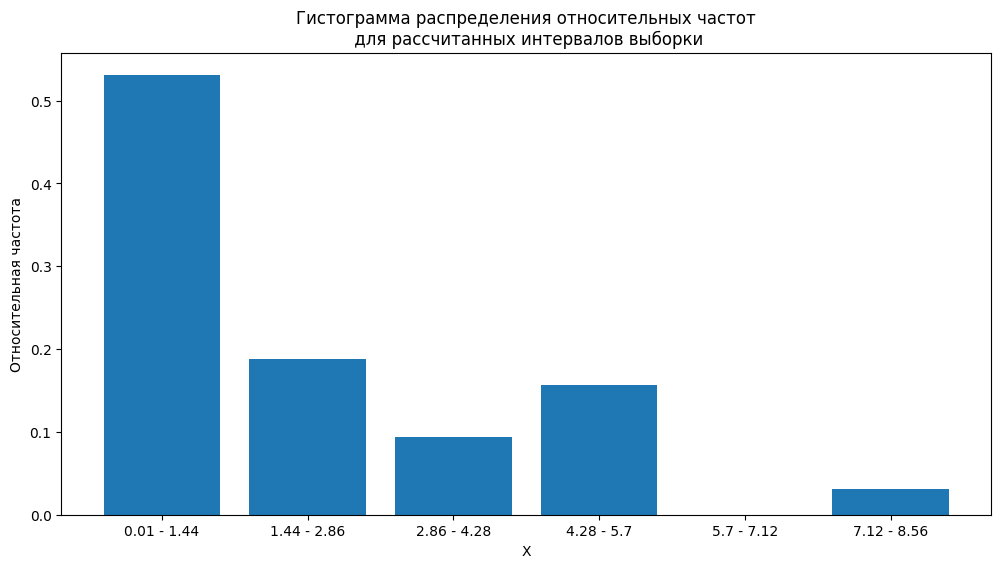

In [ ]:
# показательное распределение
data = open_file('3.txt')

# Отрисовка гистограммы
int, absolute_freq, relative_freq = show_hist(data) # show_hist вычисляет интервалы, частоты и рисует гистограмму

In [ ]:
# Проверка гипотезы о нормальности распределения
Normality_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о нормальности распределения

Выборочное среднее для всей выборки: 2.03
Несмещенное стандартное отклонение 2.053

 0 [0.013, 1.435] ni: 17 - эмпирическая частота на интервале; Ф_left: -0.29 Ф_right: -0.982  Теор частота 7.131

 1 [1.435, 2.857] ni: 6 - эмпирическая частота на интервале; Ф_left: 0.403 Ф_right: -0.29  Теор частота 8.66

 2 [2.857, 4.28] ni: 3 - эмпирическая частота на интервале; Ф_left: 1.096 Ф_right: 0.403  Теор частота 6.622

 3 [4.28, 5.702] ni: 5 - эмпирическая частота на интервале; Ф_left: 1.789 Ф_right: 1.096  Теор частота 3.191

 4 [5.702, 7.124] ni: 0 - эмпирическая частота на интервале; Ф_left: 2.481 Ф_right: 1.789  Теор частота 0.968

 5 [7.124, 8.556] ni: 1 - эмпирическая частота на интервале; Ф_left: 3.179 Ф_right: 2.481  Теор частота 0.186

Критерий согласия Пирсона
Кси нашего распределения: 22.01230388180074
Кси нормального распределения: 7.814727903251179

Вывод о принятии или отвержении нулевой гипотезы
Нулевая гипотеза отвергается
Распр

In [ ]:
# Проверка гипотезы о показательном распределении
Exponential_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о показательном распределении

Выборочное среднее для всей выборки: 2.03
Несмещенное стандартное отклонение 2.053

 0 [0.013, 1.435] ni: 17 - эмпирическая частота на интервале;  Теор частота 16.014213145070052

 1 [1.435, 2.857] ni: 6 - эмпирическая частота на интервале;  Теор частота 7.948506414651418

 2 [2.857, 4.28] ni: 3 - эмпирическая частота на интервале;  Теор частота 3.9470822827863343

 3 [4.28, 5.702] ni: 5 - эмпирическая частота на интервале;  Теор частота 1.9571830227336289

 4 [5.702, 7.124] ni: 0 - эмпирическая частота на интервале;  Теор частота 0.9714296712501428

 5 [7.124, 8.556] ni: 1 - эмпирическая частота на интервале;  Теор частота 0.48449502698444824

Критерий согласия Пирсона
Кси нашего распределения: 7.016161727929531
Кси показательного распределения: 43.77297182574219

Вывод о принятии или отвержении нулевой гипотезы
Нулевая гипотеза принимается
Распределение является показательным


Анаморфоза для нормального распределения
log(w): [-0.63252256 -1.67397643 -2.36712361 -1.85629799 -3.4657359 ]
mae: [1.70479895e+00 1.35304594e-02 2.36642997e+00 8.76941912e+00
 3.37598243e+01]

Поиск параметров нормального распределения по построенным прямым (sigma или std)
sigma (std) = 2.9063425332172645


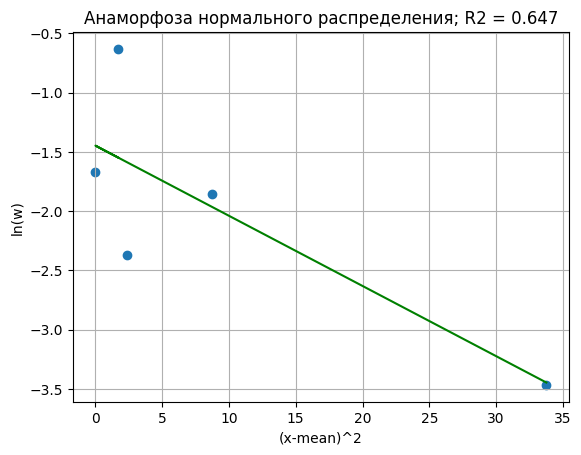

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для нормального распределения
Normal_anamorphosis(data, int, relative_freq)

Анаморфоза для показательного распределения
log(w): [-0.63252256 -1.67397643 -2.36712361 -1.85629799 -3.4657359 ]
centres [0.724 2.146 3.568 4.991 7.84 ]

Поиск параметров показательного распределения по построенным прямым (lambda)
lambda = 2.879326659621032


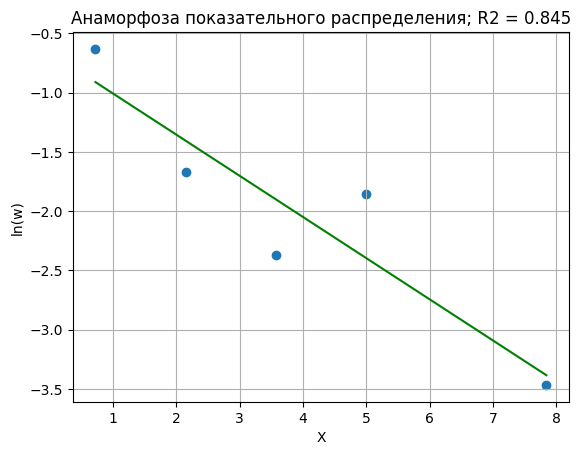

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для показательного распределения
Exponential_anamorphosis(data, int, relative_freq)

## Файл '6.txt' - показательное распределение

Длина списка: 128
Интервалы: [[0.003, 1.018], [1.018, 2.034], [2.034, 3.05], [3.05, 4.065], [4.065, 5.081], [5.081, 6.096], [6.096, 7.112], [7.112, 8.137]]
Абсолютные частоты: [66, 35, 9, 9, 5, 2, 1, 0]
Относительные частоты: [0.515625  0.2734375 0.0703125 0.0703125 0.0390625 0.015625  0.0078125
 0.       ]


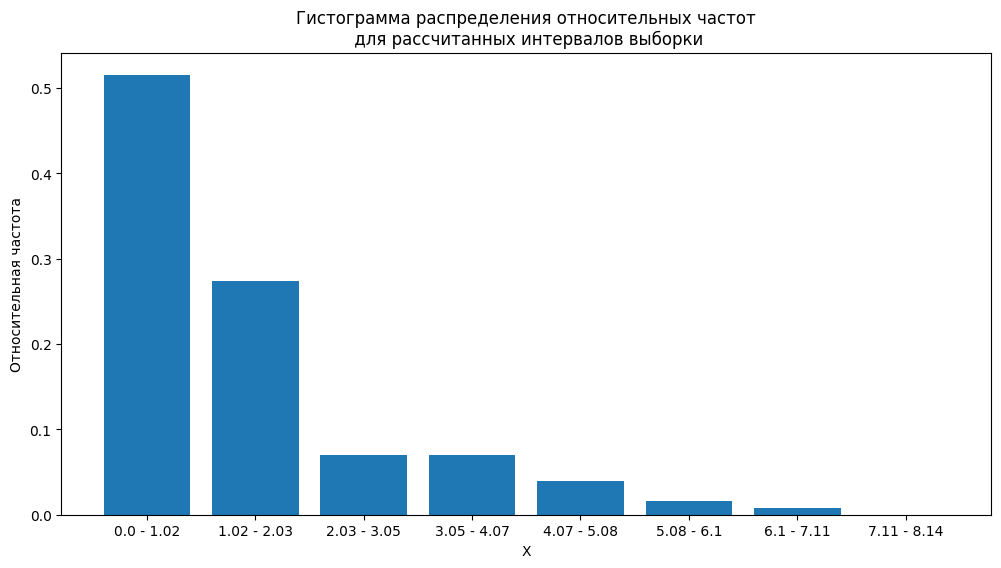

In [ ]:
# показательное распределение
data = open_file('6.txt')

# Отрисовка гистограммы
int, absolute_freq, relative_freq = show_hist(data) # show_hist вычисляет интервалы, частоты и рисует гистограмму

In [ ]:
# Проверка гипотезы о нормальности распределения
Normality_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о нормальности распределения

Выборочное среднее для всей выборки: 1.461
Несмещенное стандартное отклонение 1.485

 0 [0.003, 1.018] ni: 66 - эмпирическая частота на интервале; Ф_left: -0.298 Ф_right: -0.982  Теор частота 28.135

 1 [1.018, 2.034] ni: 35 - эмпирическая частота на интервале; Ф_left: 0.386 Ф_right: -0.298  Теор частота 34.227

 2 [2.034, 3.05] ni: 9 - эмпирическая частота на интервале; Ф_left: 1.07 Ф_right: 0.386  Теор частота 26.552

 3 [3.05, 4.065] ni: 9 - эмпирическая частота на интервале; Ф_left: 1.754 Ф_right: 1.07  Теор частота 13.132

 4 [4.065, 5.081] ni: 5 - эмпирическая частота на интервале; Ф_left: 2.438 Ф_right: 1.754  Теор частота 4.138

 5 [5.081, 6.096] ni: 2 - эмпирическая частота на интервале; Ф_left: 3.121 Ф_right: 2.438  Теор частота 0.83

 6 [6.096, 7.112] ni: 1 - эмпирическая частота на интервале; Ф_left: 3.805 Ф_right: 3.121  Теор частота 0.106

 7 [7.112, 8.137] ni: 0 - эмпирическая частота на интервале; Ф_left: 4.496 Ф_right: 3.

In [ ]:
# Проверка гипотезы о показательном распределении
Exponential_distribution_test(data, int, absolute_freq, relative_freq)

Проверка гипотезы о показательном распределении

Выборочное среднее для всей выборки: 1.461
Несмещенное стандартное отклонение 1.485

 0 [0.003, 1.018] ni: 66 - эмпирическая частота на интервале;  Теор частота 63.96970754703211

 1 [1.018, 2.034] ni: 35 - эмпирическая частота на интервале;  Теор частота 31.95606050822937

 2 [2.034, 3.05] ni: 9 - эмпирическая частота на интервале;  Теор частота 15.941850371743397

 3 [3.05, 4.065] ni: 9 - эмпирическая частота на интервале;  Теор частота 7.947455500723231

 4 [4.065, 5.081] ni: 5 - эмпирическая частота на интервале;  Теор частота 3.970150538531809

 5 [5.081, 6.096] ni: 2 - эмпирическая частота на интервале;  Теор частота 1.979230390474636

 6 [6.096, 7.112] ni: 1 - эмпирическая частота на интервале;  Теор частота 0.9887243281709891

 7 [7.112, 8.137] ni: 0 - эмпирическая частота на интервале;  Теор частота 0.4962581841074174

Критерий согласия Пирсона
Кси нашего распределения: 4.280344138949815
Кси показательного распределения: 153.197

Анаморфоза для нормального распределения
log(w): [-0.66237552 -1.2966822  -2.65480569 -2.65480569 -3.24259235 -4.15888308
 -4.85203026]
mae: [9.04914808e-01 4.18995962e-03 1.16797711e+00 4.39627626e+00
 9.68286295e+00 1.70298996e+01 2.64476708e+01]

Поиск параметров нормального распределения по построенным прямым (sigma или std)
sigma (std) = 1.9359077129707294


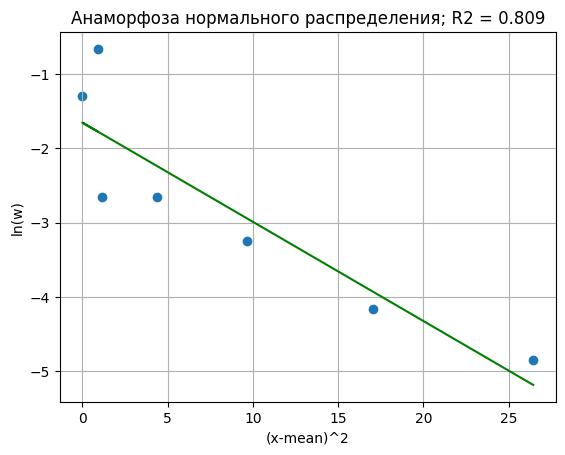

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для нормального распределения
Normal_anamorphosis(data, int, relative_freq)

Анаморфоза для показательного распределения
log(w): [-0.66237552 -1.2966822  -2.65480569 -2.65480569 -3.24259235 -4.15888308
 -4.85203026]
centres [0.51  1.526 2.542 3.558 4.573 5.588 6.604]

Поиск параметров показательного распределения по построенным прямым (lambda)
lambda = 1.506097476979313


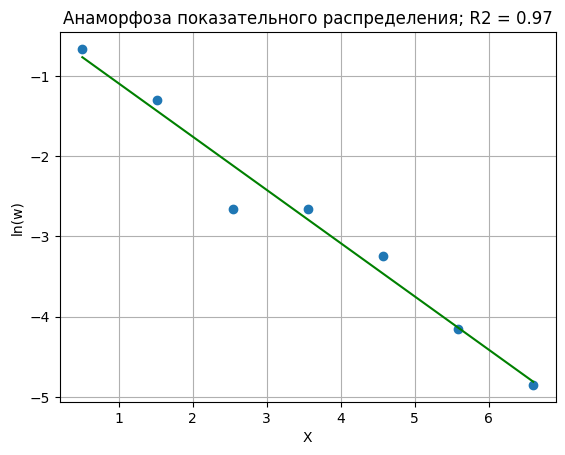

<Figure size 500x500 with 0 Axes>

In [ ]:
# Анаморфоза для показательного распределения
Exponential_anamorphosis(data, int, relative_freq)